### Import Libraries

In [1]:
# Import necessary libraries for data analysis and visualization
import numpy as np  # Numerical computations
import pandas as pd  # Data manipulation
import matplotlib.pyplot as plt  # Visualizations
import seaborn as sns  # Advanced visualizations

### Load Dataset

In [2]:
# Load the dataset from a CSV file
# Ensure the correct file path is used
data = pd.read_csv("C:/Users/muge/Dropbox/GMU/AIT 580/Module 1/1_Lab-Movies_AIT580.csv")

# Basic inspection
# Display the first few rows of the dataset
print(data.head())

# Display dataset information such as column names, data types, and non-null values
print(data.info())

# Print the data types of each column
print(data.dtypes)

                        Title US Gross Worldwide Gross  US DVD Sales  \
0              The Land Girls   146083          146083           NaN   
1      First Love, Last Rites    10876           10876           NaN   
2  I Married a Strange Person   203134          203134           NaN   
3        Let's Talk About Sex   373615          373615           NaN   
4                        Slam  1009819         1087521           NaN   

   Production Budget Release Date MPAA Rating  Running Time (min) Distributor  \
0          8000000.0    12-Jun-98           R                 NaN    Gramercy   
1           300000.0     7-Aug-98           R                 NaN      Strand   
2           250000.0    28-Aug-98         NaN                 NaN   Lionsgate   
3           300000.0    11-Sep-98         NaN                 NaN   Fine Line   
4          1000000.0     9-Oct-98           R                 NaN     Trimark   

                Source Major Genre         Creative Type Director  \
0          

### A. Data Cleaning

#### Step 1. Handle Missing Values

Missing values per column:
 Title                        0
US Gross                     0
Worldwide Gross              0
US DVD Sales              2637
Production Budget            1
Release Date                 0
MPAA Rating                605
Running Time (min)        1992
Distributor                232
Source                     365
Major Genre                275
Creative Type              446
Director                  1331
Rotten Tomatoes Rating     880
IMDB Rating                213
IMDB Votes                 213
dtype: int64


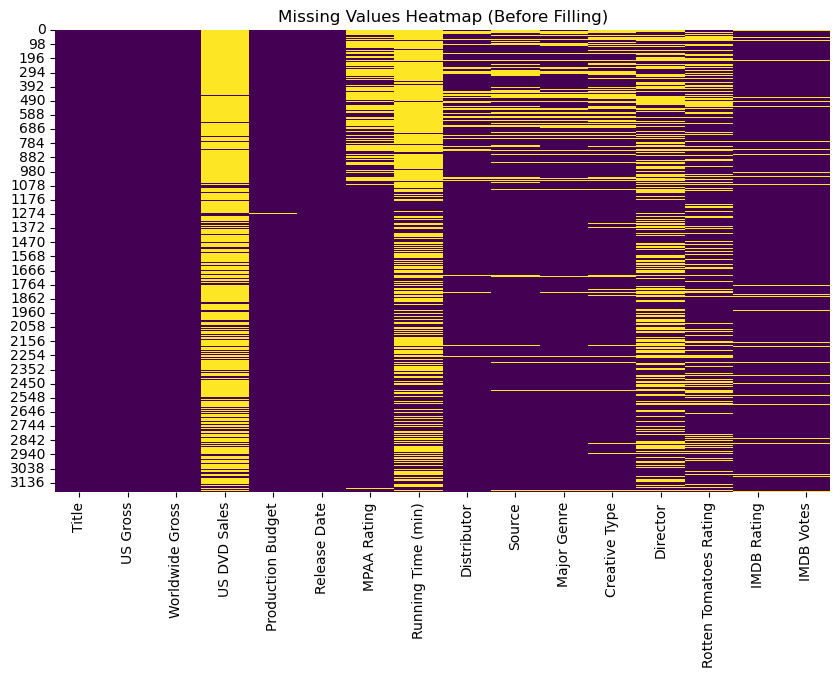

In [3]:
# Check for missing values in the dataset
print("Missing values per column:\n", data.isnull().sum())

# Visualize the missing values using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cmap="viridis", cbar=False)
plt.title("Missing Values Heatmap (Before Filling)")
plt.show()

* The columns with the most missing values are US DVD Sales (2637), Running Time (min) (1,992), Director (1,331), and Rotten Tomatoes Rating (880).
* Some columns have no missing values at all (e.g., Title, US Gross, and Worldwide Gross).
* For columns like MPAA Rating, and Creative Type, there are notable gaps in the data, and it might be necessary to handle these missing values before any analysis.

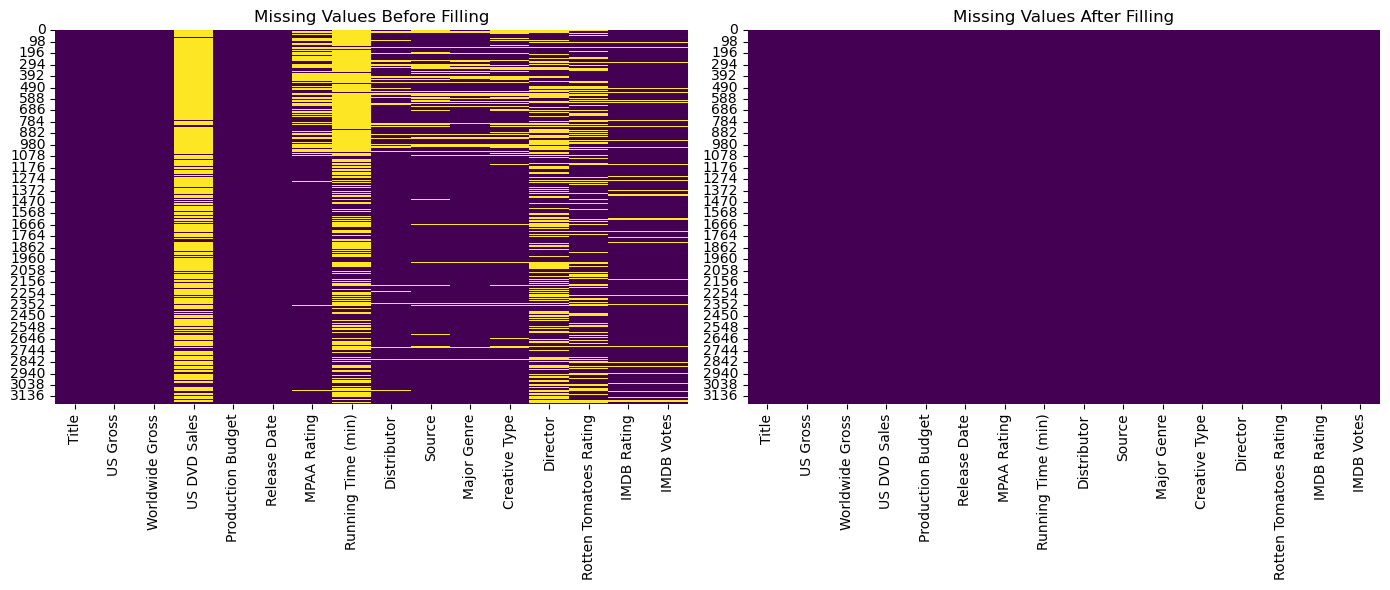

In [4]:
# Create a backup copy of the dataset before making modifications
data_before = data.copy()

# Fill missing numerical values with the median
num_cols = data.select_dtypes(include=['float64']).columns
data[num_cols] = data[num_cols].fillna(data[num_cols].median())

# Fill missing categorical values with "Unknown"
cat_cols = data.select_dtypes(include=['object']).columns
data[cat_cols] = data[cat_cols].fillna("Unknown")

# Compare missing values before and after handling
# Side-by-side heatmaps before and after filling missing values
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
# Heatmap BEFORE filling missing values
sns.heatmap(data_before.isnull(), cmap="viridis", cbar=False, ax=axes[0])
axes[0].set_title("Missing Values Before Filling")
# Heatmap AFTER filling missing values
sns.heatmap(data.isnull(), cmap="viridis", cbar=False, ax=axes[1])
axes[1].set_title("Missing Values After Filling")
plt.tight_layout()
plt.show()

#### Step 2. Convert Columns to Appropriate Data Types

In [5]:
# Replace "Unknown" values with NaN in relevant columns
for col in ["US Gross", "Worldwide Gross"]:
    data[col] = data[col].replace("Unknown", np.nan)
    data[col] = data[col].replace('[\$,]', '', regex=True).astype(float)
print(data.dtypes)

Title                      object
US Gross                  float64
Worldwide Gross           float64
US DVD Sales              float64
Production Budget         float64
Release Date               object
MPAA Rating                object
Running Time (min)        float64
Distributor                object
Source                     object
Major Genre                object
Creative Type              object
Director                   object
Rotten Tomatoes Rating    float64
IMDB Rating               float64
IMDB Votes                float64
dtype: object


* The "US Gross" and "Worldwide Gross" columns have been successfully converted from string representations (with dollar signs and commas) to float64.
* Some columns like "Release Date", "MPAA Rating", and "Distributor" remain as object types, which might require further conversion depending on the intended analysis (e.g., converting release dates to datetime type).
* The dataset now has appropriate numerical types for financial columns and ratings, enabling more straightforward numerical analysis.

#### Step 3. Convert Dates to Proper Format

In [6]:
# Convert "Release Date" column to datetime format
data["Release Date"] = pd.to_datetime(data["Release Date"], errors='coerce')
print(data.dtypes)

Title                             object
US Gross                         float64
Worldwide Gross                  float64
US DVD Sales                     float64
Production Budget                float64
Release Date              datetime64[ns]
MPAA Rating                       object
Running Time (min)               float64
Distributor                       object
Source                            object
Major Genre                       object
Creative Type                     object
Director                          object
Rotten Tomatoes Rating           float64
IMDB Rating                      float64
IMDB Votes                       float64
dtype: object


The "Release Date" column has been successfully converted to a proper datetime format, enabling time-based operations on that column (e.g., extracting the year, calculating time differences, etc.).

#### Step 4. Normalize Text Data

In [7]:
# Convert text columns to lowercase and strip unnecessary spaces
text_cols = ["MPAA Rating", "Distributor", "Source", "Major Genre", "Creative Type", "Director"]
data[text_cols] = data[text_cols].apply(lambda x: x.str.lower().str.strip())

#### Step 5. Remove Outliers

In [8]:
# Define a function to remove outliers using the IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[column] >= (Q1 - 1.5 * IQR)) & (df[column] <= (Q3 + 1.5 * IQR))]

# Apply outlier removal to specific numerical columns
for col in ["US Gross", "Worldwide Gross", "Production Budget", "IMDB Rating"]:
    data = remove_outliers(data, col)

#### Step 6. Convert Ratings to Categorical Data

In [9]:
# Define an ordered category for MPAA Ratings
rating_order = ["unknown", "g", "pg", "pg-13", "r", "nc-17"]
data["MPAA Rating"] = pd.Categorical(data["MPAA Rating"], categories=rating_order, ordered=True)

The "MPAA Rating" column is now a pandas Categorical data type with a predefined order. The categories are ordered from "unknown" to "nc-17

In [10]:
# Save the cleaned data to a new CSV file (uncomment if needed)
# data.to_csv("cleaned_movies_data.csv", index=False)

### B. Exploratory Data Analysis (EDA)

#### Step 1. Basic Inspection

In [11]:
# Display the first few rows of the cleaned dataset
print(data.head())
# Print dataset shape (number of rows and columns)
print(data.shape)
# Print column data types and missing values
print(data.info())
print(data.isnull().sum()) # Missing values count per column

                        Title   US Gross  Worldwide Gross  US DVD Sales  \
0              The Land Girls   146083.0         146083.0    20331557.5   
1      First Love, Last Rites    10876.0          10876.0    20331557.5   
2  I Married a Strange Person   203134.0         203134.0    20331557.5   
3        Let's Talk About Sex   373615.0         373615.0    20331557.5   
4                        Slam  1009819.0        1087521.0    20331557.5   

   Production Budget Release Date MPAA Rating  Running Time (min) Distributor  \
0          8000000.0   1998-06-12           r               107.0    gramercy   
1           300000.0   1998-08-07           r               107.0      strand   
2           250000.0   1998-08-28     unknown               107.0   lionsgate   
3           300000.0   1998-09-11     unknown               107.0   fine line   
4          1000000.0   1998-10-09           r               107.0     trimark   

                Source Major Genre         Creative Type Direc

#### Summary of the Data:
* The dataset contains 2544 rows and 16 columns.
* There are some missing values:
    * 7 missing values in the Release Date column.
    * 92 missing values in the MPAA Rating column.
* Most of the columns are complete, with no missing data.
* The MPAA Rating column is now of category type, which is a more efficient way to store categorical data (with an ordered category defined earlier in the process).
* The Release Date column has been successfully converted to datetime64 format but still has a few missing entries that need to be addressed.

#### Next Steps:
* The missing values for Release Date and MPAA Rating should be handled:
    * Release Date could be filled with a default date, interpolated, or left as missing if date-based analysis is not crucial.
    * MPAA Rating could be filled with a placeholder like "unknown" or inferred based on other columns, depending on the context.

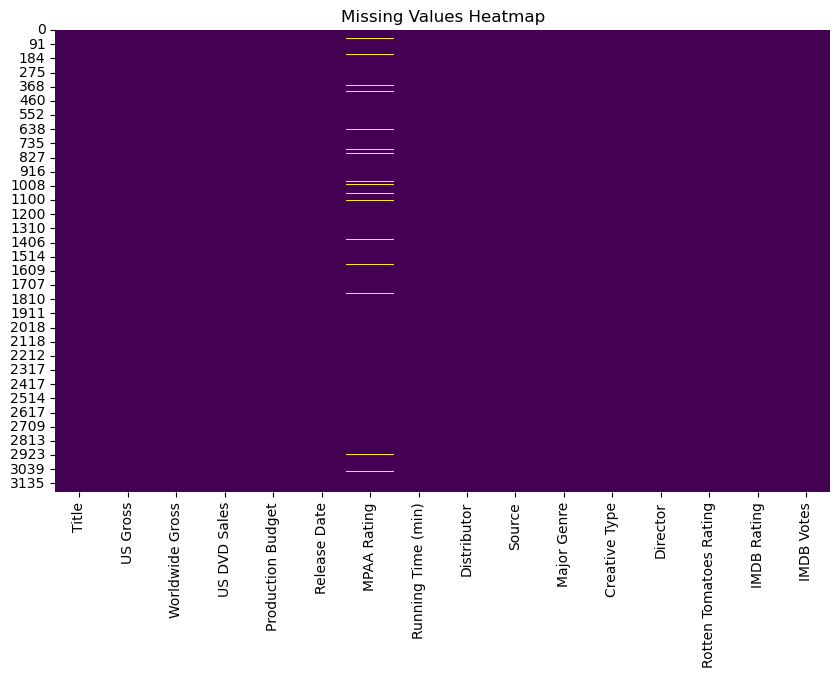

In [12]:
# Summarize missing values visually
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull(), cmap="viridis", cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

#### Step 2. Summary Statistics

In [13]:
# Summary statistics for numerical columns
print(data.describe())
# Summary statistics for categorical columns
print(data.describe(include=['object']))

           US Gross  Worldwide Gross  US DVD Sales  Production Budget  \
count  2.544000e+03     2.544000e+03  2.544000e+03       2.544000e+03   
mean   2.337578e+07     3.587812e+07  2.013759e+07       2.018550e+07   
std    2.459478e+07     4.015903e+07  6.171187e+06       1.845947e+07   
min    0.000000e+00     0.000000e+00  8.539730e+05       2.180000e+02   
25%    3.379354e+06     5.311575e+06  2.033156e+07       5.000000e+06   
50%    1.500000e+07     2.039446e+07  2.033156e+07       1.500000e+07   
75%    3.602452e+07     5.286383e+07  2.033156e+07       3.000000e+07   
max    1.272141e+08     1.707640e+08  1.345554e+08       7.600000e+07   

       Running Time (min)  Rotten Tomatoes Rating  IMDB Rating    IMDB Votes  
count         2544.000000             2544.000000  2544.000000    2544.00000  
mean           107.085299               53.948506     6.320283   21198.77555  
std              9.797367               23.608638     1.083860   31857.98423  
min             46.000000 

The numerical columns show a wide distribution in values:
* For example, the US Gross and Worldwide Gross values span from 0 to over 100 million, with a mean value of approximately $23.4 million and $35.9 million, respectively.
* The IMDB Rating has an average of 6.32, with values ranging from 3.4 to 9.2.
* The Running Time for most movies is around 107 minutes, with a few extreme outliers (as high as 191 minutes).
    
The categorical columns show some common entries:
* "Crash" is the most frequent movie title, though it appears only 2 times.
* "Warner Bros." is the most common distributor, while "original screenplay" is the most frequent source of movies.
* Drama is the most common genre, and "contemporary fiction" is the most frequent creative type.
* A significant number of movies have "unknown" as their director, suggesting missing or incomplete data in this column.

#### Step 3. Check for Duplicates

In [14]:
print("Duplicate rows: ", data.duplicated().sum())
data = data.drop_duplicates()

Duplicate rows:  0


#### Step 4. Data Distributions & Outliers

<Figure size 2400x1200 with 0 Axes>

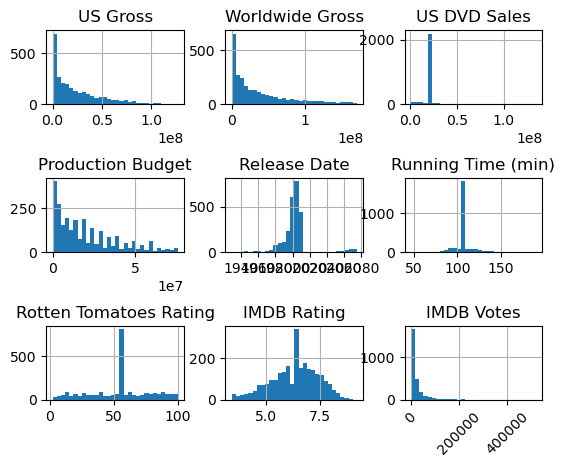

In [15]:
# Plot histograms for numerical features
plt.figure(figsize=(24, 12))  # Increase the figure size for larger charts
data.hist(bins=30)
plt.xticks(rotation=45)  # Rotate the x-axis labels by 45 degrees
plt.subplots_adjust(hspace=1)  # Adjust the space between rows
plt.show()

1. US Gross:

    Highly skewed to the right (positive skew).
    Most movies make relatively little money in the US. A few movies generate very high gross revenues. This is typical for the film industry, where blockbusters drive a significant portion of the total revenue.
    
2. Worldwide Gross:

    Similar to US Gross, highly skewed to the right.
    Again, a few movies dominate worldwide gross, while most make relatively less. The pattern is similar to US Gross, suggesting a correlation between US and worldwide success.
    
3. US DVD Sales:

    Appears to be a single spike or a very narrow distribution around a low value.
    Most movies have very low US DVD sales. There might be a few outliers with significantly higher sales, but the data is concentrated around a very low point. This could imply that DVD sales are not a major revenue source for most movies.
    
4. Production Budget:

    Skewed to the right, but less extremely than gross revenues. There are distinct "steps" or "bins" in the distribution, suggesting possible categories or round numbers used for budgets.
    Most movies have relatively low production budgets. A few movies have very high budgets. The steps might indicate budget tiers or common budget amounts.
    
5. Release Date:

    Bimodal or multimodal distribution. Peaks appear in the more recent years.
    This suggests that the dataset contains more recent movies than older ones. The multiple peaks could indicate periods with higher movie production or data collection bias.
    
6. Running Time (min):

    Near-normal distribution centered around a specific value (likely around 100-120 minutes).
    Most movies have a running time within a typical range. There are fewer very short or very long movies.
    
7. Rotten Tomatoes Rating:

    Appears to be somewhat bimodal, with a peak around 60.
    This could suggest that movies are often rated either "fresh" (positive) or "rotten" (negative) with a less frequent middle ground. The peaks indicate common rating scores.
    
8. IMDB Rating:

    Near-normal distribution centered around a specific value (likely around 6.5).
    Most movies receive average to slightly above-average ratings on IMDB. The distribution is relatively symmetrical, suggesting a wide range of opinions.
    
9. IMDB Votes:

    Highly skewed to the right, similar to gross revenues.
    Most movies receive relatively few votes on IMDB. A few very popular movies receive a very large number of votes. This aligns with the idea that only a small fraction of movies become highly popular.
    
#### Overall Observations:

* Skewness: Many financial metrics (gross revenues, budget, votes) are highly skewed, indicating the presence of outliers and a wide range of values.
* Typical Ranges: Running time and ratings tend to fall within more typical ranges, suggesting more consistent patterns.
* Possible Outliers: The highly skewed distributions suggest the presence of outliers, which might be worth investigating further.

#### Potential Insights:

* The data could be used to explore correlations between budget, ratings, and financial success.
* The high skewness in financial metrics might require logarithmic transformations for some analyses.
* The distribution of release dates could indicate trends in movie production over time.


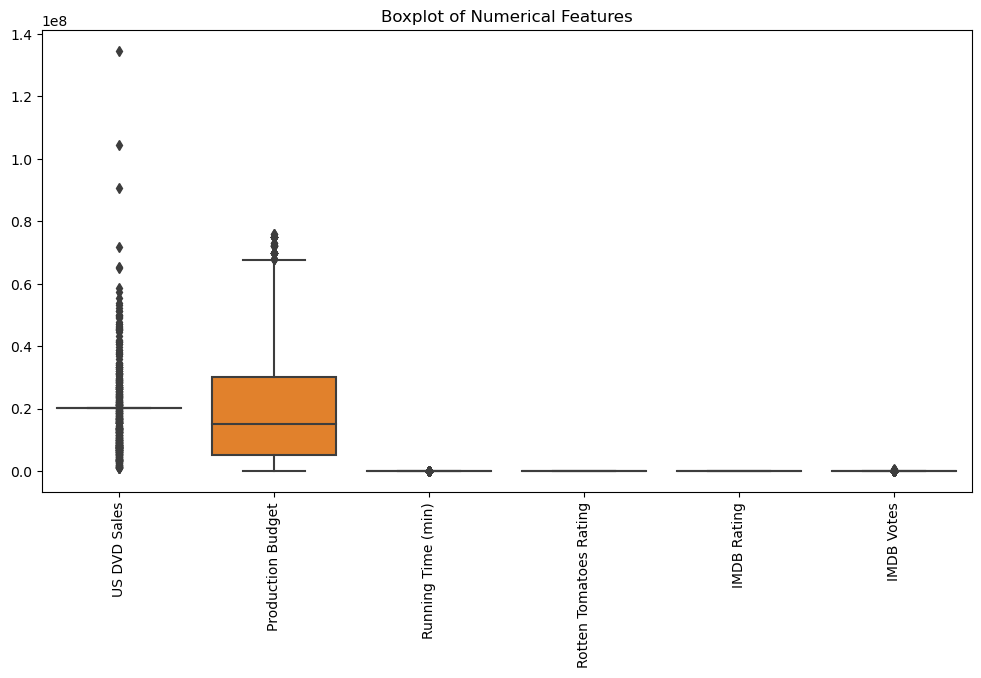

In [16]:
# Boxplot to detect outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[num_cols])
plt.xticks(rotation=90)
plt.title("Boxplot of Numerical Features")
plt.show()

#### Understanding Boxplots:

* Box: Represents the interquartile range (IQR), containing the middle 50% of the data.
* Line inside the box: Represents the median (50th percentile).
* Whiskers: Extend to 1.5 times the IQR from the box edges.
* Outliers: Points beyond the whiskers, indicating potentially unusual values.

1. US DVD Sales:

* The box is very small and close to zero, suggesting that most movies have very low DVD sales.
* There are numerous outliers far above the upper whisker, indicating a few movies with significantly high DVD sales.
* This confirms the trend we saw in the histogram, that most movies do not sell many DVDs, but a select few sell a very large amount.

2. Production Budget:

* The box is wider than the US DVD Sales box, indicating a wider range of production budgets.
* There are several outliers above the upper whisker, showing movies with very high budgets.
* The median is closer to the bottom of the box, showing that more movies have smaller budgets.
* This also confirms the skew to the right that was seen in the histogram.

3. Running Time (min):

* The box is very narrow, indicating a relatively consistent running time for most movies.
* There are a few outliers, suggesting some movies with unusually long or short running times.
* The boxplot shows a very small range, showing that most movies are close to the same running time.

4. Rotten Tomatoes Rating:

* The box is also narrow, showing that the ratings are in a small range.
* There are a couple of outliers, but not many.
* The median is in the center of the box, showing a normal distribution of the data.

5. IMDB Rating:

* Similar to Rotten Tomatoes Rating, the box is narrow, indicating a consistent range of ratings.
* There are very few outliers.
* The median is in the center of the box, showing a normal distribution of the data.

6. IMDB Votes:

* The box is extremely small and close to zero, similar to US DVD Sales.
* This boxplot shows the large skew to the right that was also shown in the histogram.

#### Overall Observations:

* Outliers: Several features (US DVD Sales, Production Budget) have significant outliers, highlighting the variability in the movie industry.
* Consistent Ranges: Running Time, Rotten Tomatoes Rating, and IMDB Rating show relatively consistent ranges, suggesting more standardized distributions.
* Skewness: The boxplots confirm the skewness observed in the histograms, particularly for financial metrics and vote counts.

#### Step 5. Univariate Analysis

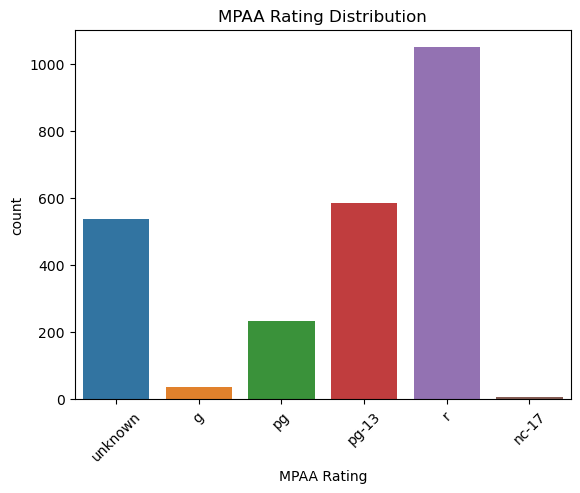

In [17]:
# Count plot for MPAA Ratings
sns.countplot(x="MPAA Rating", data=data)
plt.title("MPAA Rating Distribution")
plt.xticks(rotation=45)
plt.show()

"MPAA Rating" - Lists the different MPAA rating categories:
* unknown: Movies where the rating is not specified.
* g: General Audiences - Suitable for all ages.
* pg: Parental Guidance Suggested - Some material may not be suitable for children.
* pg-13: Parents Strongly Cautioned - Some material may be inappropriate for children under 13.
* r: Restricted - Under 17 requires accompanying parent or adult guardian.
* nc-17: No1 One 17 and Under Admitted2 - Clearly adult. 

* R is the most frequent rating: The tallest bar is for "r", indicating that this dataset contains the highest number of R-rated movies.
* PG-13 is the second most frequent: The second tallest bar is for "pg-13", showing a significant number of movies with this rating.
* Unknown ratings: There's a considerable number of movies with "unknown" ratings, suggesting missing data or movies not yet rated.
* Other ratings: "pg" and "g" ratings are present, but in smaller numbers compared to "r" and "pg-13".
* NC-17 is the least frequent: The "nc-17" rating has the smallest bar, indicating very few movies in this category.

#### Overall Insights:

* The dataset is heavily skewed towards R-rated and PG-13-rated movies, implying a focus on movies with more mature content.
* The significant number of "unknown" ratings suggests a need for data cleaning or further investigation.
* The relatively low numbers of "g" and "pg" ratings might indicate a smaller representation of family-friendly films in this dataset.

#### Possible Implications:

* The distribution could be used to analyze trends in movie production and rating over time.
* The "unknown" ratings could be addressed to improve the accuracy of any analysis based on this dataset.

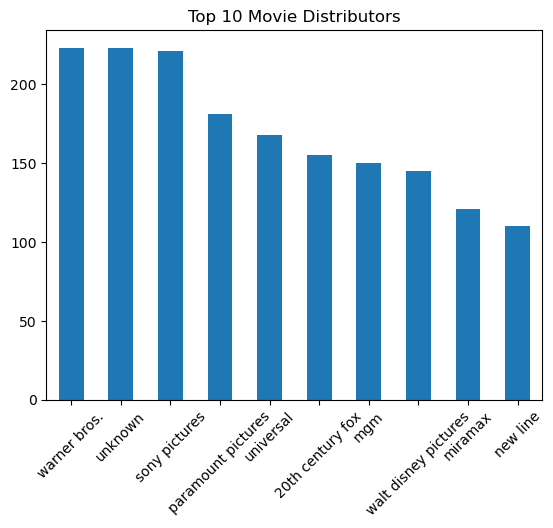

In [18]:
# Top 10 Distributors with Most Movies
data["Distributor"].value_counts().head(10).plot(kind="bar")
plt.title("Top 10 Movie Distributors")
plt.xticks(rotation=45)
plt.show()

Warner Bros. is the top distributor: The tallest bar represents Warner Bros., indicating they have distributed the most movies in this dataset.

"Unknown" is second: Interestingly, the second highest count is for "unknown," suggesting a significant number of movies where the distributor is not specified. This could be due to missing data or incomplete records.

#### Overall Insights:

* Warner Bros. is the leading distributor in this dataset.
* The presence of "unknown" highlights a potential data quality issue.

#### Possible Implications:

* This data can be used to analyze market share and influence of different movie distributors.
* The "unknown" category might warrant further investigation to improve data accuracy.

#### Step 6. Bivariate Analysis

C:\Users\muge\AppData\Local\Temp\ipykernel_24920\2167713735.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")


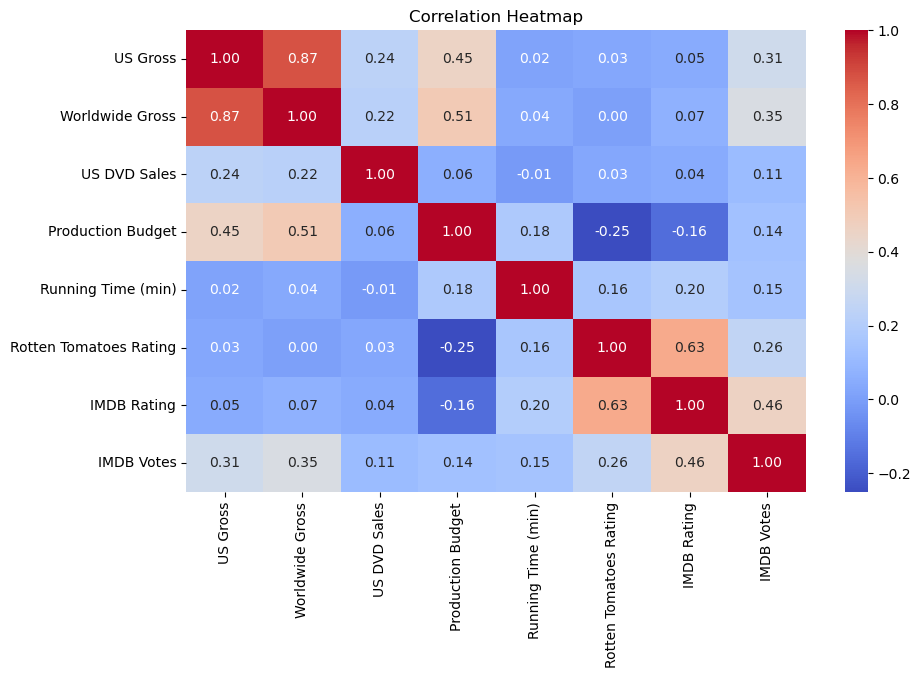

In [19]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Correlation Coefficients: The numbers in each cell represent the correlation coefficient between the corresponding row and column variables.

* Correlation coefficients range from -1 to +1.
    * +1 indicates a perfect positive correlation (as one variable increases, the other increases proportionally).
    * -1 indicates a perfect negative correlation (as one variable increases, the other decreases proportionally).   
    * 0 indicates no linear correlation.   
* Color Scale: The color scale visually represents the correlation coefficients.
    * Red typically indicates positive correlations.
    * Blue typically indicates negative correlations.
    * The intensity of the color indicates the strength of the correlation.

#### Strong Positive Correlations:
* US Gross and Worldwide Gross (0.87): This shows a strong positive correlation, meaning movies that perform well in the US tend to perform well worldwide.
* Rotten Tomatoes Rating and IMDB Rating (0.63): There's a relatively strong positive correlation, suggesting that movies rated highly by critics on Rotten Tomatoes also tend to be rated highly by users on IMDB.
* IMDB Rating and IMDB Votes (0.46): there is a medium level positive correlation, meaning that movies with higher IMDB ratings tend to have more votes.
* Production Budget and Worldwide Gross (0.51) and US Gross (0.45): There is a medium level positive correlation, meaning that movies with higher production budgets tend to have higher gross results.

#### Weak Correlations:
* Most other correlations are relatively weak (close to 0), indicating little to no linear relationship between those variables.
* Running time vs other variables: Running time has very little correlation with other variables.

#### Negative Correlations:
* Rotten Tomatoes Rating and Production Budget (-0.25): There is a slight negative correlation, meaning that higher budget movies tend to have slightly lower rotten tomato ratings.
* IMDB Rating and Production Budget (-0.16): There is a slight negative correlation, meaning that higher budget movies tend to have slightly lower IMDB ratings.

#### Overall Insights:
* The heatmap reveals strong relationships between financial metrics (gross revenues) and between rating metrics (Rotten Tomatoes and IMDB).
* Production budget has a moderate correlation with financial success but a slight negative correlation with rating.
* Running time has very little correlation with the other variables.

#### Possible Implications:
* This information can be used to understand the factors that influence movie success.
* The slight negative correlation between budget and ratings could be explored further to see if there is a real trend, or if it is just a coincidence.

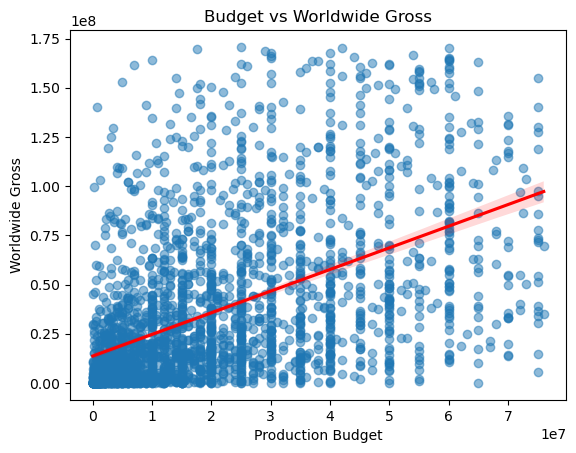

In [20]:
# Scatter plot of Budget vs Worldwide Gross
# Scatter plot with red regression line
sns.regplot(x="Production Budget", y="Worldwide Gross", data=data, scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})  
plt.title("Budget vs Worldwide Gross")
plt.show()

#### Data Points:
* Each point on the chart represents a movie.
* The position of the point indicates the movie's production budget and worldwide gross.

* Positive Correlation: There appears to be a positive correlation between production budget and worldwide gross. As the production budget increases, the worldwide gross tends to increase as well. This means that movies with higher budgets are more likely to have higher worldwide earnings.
* Wide Scatter: However, the scatter of points is quite wide, indicating that the correlation is not perfect. There are many movies with high budgets that did not achieve high worldwide gross, and vice versa. This suggests that other factors also play a significant role in a movie's success.
* Clustering at Lower End: There's a dense cluster of points at the lower end of both axes. This indicates that a large number of movies have both low budgets and low worldwide gross.
* Outliers: There are some noticeable outliers, particularly movies with high budgets and high worldwide gross. These could represent blockbuster hits.

#### Overall Insights:

* Budget is a factor: Production budget is a factor in determining worldwide gross, but it's not the only factor.
* Risk and Reward: Higher budgets can lead to higher potential rewards, but also carry greater risk.
* Other factors matter: Other factors such as marketing, cast, story, and critical reception also influence a movie's financial success.

#### Possible Implications:

* This chart suggests that investing in higher production budgets can increase the likelihood of higher worldwide gross, but it doesn't guarantee it.
* Further analysis can explore the impact of other factors on movie success.
* Understanding the relationship between budget and gross can help studios make more informed decisions about movie production.

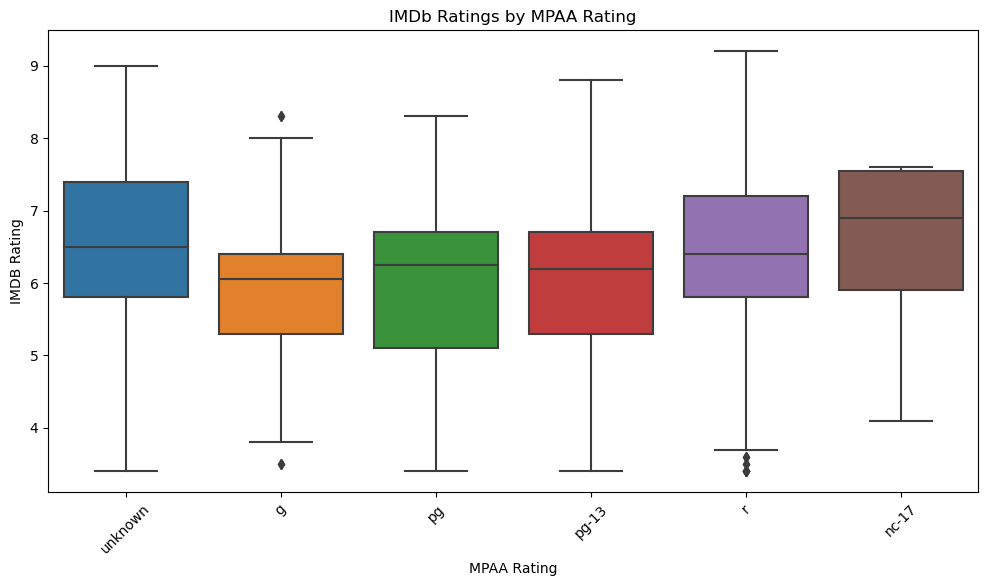

In [21]:
# Visualize the relationship between IMDb ratings and MPAA ratings
plt.figure(figsize=(12, 6))
sns.boxplot(x="MPAA Rating", y="IMDB Rating", data=data)
plt.title("IMDb Ratings by MPAA Rating")
plt.xticks(rotation=45)
plt.show()

* Unknown Ratings: The "unknown" category has a wide distribution of IMDb ratings, suggesting that movies with unknown MPAA ratings can have a wide range of audience reception.
* G-Rated Movies: G-rated movies tend to have a lower median IMDb rating compared to other categories, and a narrower distribution, indicating a more consistent level of audience reception.
* PG-Rated Movies: PG-rated movies have a wider distribution of IMDb ratings, with some higher-rated outliers.
* PG-13 Rated Movies: PG-13 rated movies show a similar pattern to PG rated movies, but with a slightly higher median and a wider distribution.
* R-Rated Movies: R-rated movies have a wide distribution, with a median close to PG-13, and a few low outliers.
* NC-17 Rated Movies: NC-17 rated movies have a slightly higher median than other categories, and a narrow distribution, indicating that they tend to be rated relatively consistently.

Overlapping Distributions: There is significant overlap in the distributions of IMDb ratings across different MPAA rating categories. This suggests that MPAA rating is not a strong predictor of IMDb rating.

#### Overall Insights:

* There is no clear trend or strong relationship between MPAA rating and IMDb rating.
* The distribution of IMDb ratings varies across different MPAA rating categories, but there is significant overlap.
* NC-17 movies tend to have slightly higher IMDb ratings.

#### Possible Implications:

* This chart suggests that audience reception (as reflected in IMDb ratings) is not strongly influenced by the MPAA rating of a movie.
* Other factors, such as genre, story, and cast, may play a more significant role in determining a movie's IMDb rating.
* The consistent high rating of NC-17 could mean that when someone goes to see a NC-17 movie, they have a certain expectation, and that expectation is being met.

#### Step 7. Time Series Analysis

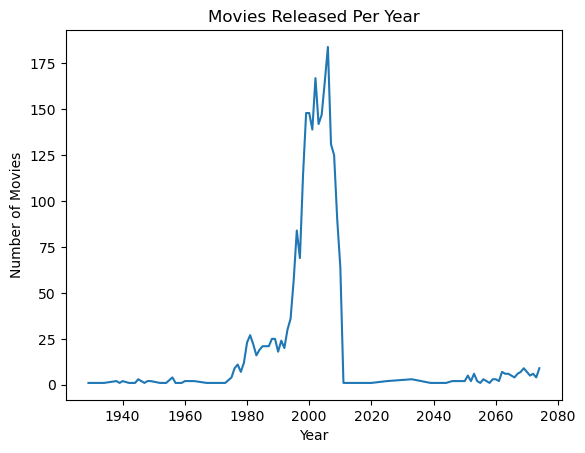

In [22]:
# Extract year from release date
data["Release Year"] = data["Release Date"].dt.year

# Analyze number of movies released per year
data["Release Year"].value_counts().sort_index().plot(kind="line")
plt.title("Movies Released Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.show()

* Early Years (1940-1980): The number of movies released per year remains relatively low and stable during this period.
* Rapid Increase (1980-2000): There's a noticeable increase in movie releases starting in the 1980s, accelerating into the 2000s.
* Peak and Sharp Drop (Around 2010): The line reaches a sharp peak around 2010, indicating a significant surge in movie releases. However, this is followed by a dramatic drop, suggesting a potential data anomaly or a significant change in data collection.
* Post-Peak (2010-2080): After the sharp drop, the number of movie releases remains low and relatively stable, with some minor fluctuations.
* Possible Future Trend (2060-2080): There is a small upward trend in the number of movies released in the latter years of the graph.

#### Overall Insights:

* Significant Growth: There was a substantial increase in movie releases in the late 20th and early 21st centuries.
* Data Anomaly: The sharp peak and drop around 2010 is likely due to an error or an incomplete dataset.
* Stable in Recent Years: The number of movies released has been relatively stable in recent years (post-anomaly).
* Future Uncertainty: The slight upward trend towards the end of the timeline might indicate a potential increase in movie releases in the future, but it's too subtle to be conclusive.

#### Possible Implications:

* Data Quality Issue: The anomaly around 2010 needs to be addressed for accurate analysis.
* Industry Trends: The general trend of increasing movie releases in the late 20th and early 21st centuries could reflect changes in movie production, distribution, or data collection.

### 5. Feature Engineering

In [23]:
# Create profit and ROI (Return on Investment) columns
data["Profit"] = data["Worldwide Gross"] - data["Production Budget"]
data["ROI"] = (data["Profit"] / data["Production Budget"]) * 100

In [24]:
# Final inspection
# Display the final cleaned dataset
print(data.head())

                        Title   US Gross  Worldwide Gross  US DVD Sales  \
0              The Land Girls   146083.0         146083.0    20331557.5   
1      First Love, Last Rites    10876.0          10876.0    20331557.5   
2  I Married a Strange Person   203134.0         203134.0    20331557.5   
3        Let's Talk About Sex   373615.0         373615.0    20331557.5   
4                        Slam  1009819.0        1087521.0    20331557.5   

   Production Budget Release Date MPAA Rating  Running Time (min) Distributor  \
0          8000000.0   1998-06-12           r               107.0    gramercy   
1           300000.0   1998-08-07           r               107.0      strand   
2           250000.0   1998-08-28     unknown               107.0   lionsgate   
3           300000.0   1998-09-11     unknown               107.0   fine line   
4          1000000.0   1998-10-09           r               107.0     trimark   

                Source Major Genre         Creative Type Direc

In [25]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2544 entries, 0 to 3198
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Title                   2544 non-null   object        
 1   US Gross                2544 non-null   float64       
 2   Worldwide Gross         2544 non-null   float64       
 3   US DVD Sales            2544 non-null   float64       
 4   Production Budget       2544 non-null   float64       
 5   Release Date            2537 non-null   datetime64[ns]
 6   MPAA Rating             2452 non-null   category      
 7   Running Time (min)      2544 non-null   float64       
 8   Distributor             2544 non-null   object        
 9   Source                  2544 non-null   object        
 10  Major Genre             2544 non-null   object        
 11  Creative Type           2544 non-null   object        
 12  Director                2544 non-null   object  

In [26]:
# Save the final cleaned dataset with the correct data types
data.to_csv("C:/Users/muge/Dropbox/GMU/Portfolio/AIT 580/Movies/cleaned_movies_data.csv", index=False)